In [ ]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd /content/drive/MyDrive/

/content/drive/MyDrive


# ChatGPT

In [ ]:
!pip install openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.9/362.9 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.6 MB/s eta 0:00:00


In [ ]:
import openai
import os



In [ ]:
!sudo apt install tesseract-ocr -y
!sudo apt install libtesseract-dev -y
!sudo apt-get install poppler-utils -y

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (4,138 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [ ]:
!pip install langchain unstructured[all-docs] pydantic lxml openai chromadb tiktoken opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 23.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 5.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 

In [ ]:
!pip install langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 28.6 MB/s eta 0:00:00


In [ ]:
import os
import uuid
import base64
from IPython import display
from unstructured.partition.pdf import partition_pdf
from langchain.chat_models import ChatOpenAI
from langchain.embeddings import OpenAIEmbeddings
from langchain.chains import LLMChain
from langchain.prompts import PromptTemplate
from langchain.schema.messages import HumanMessage, SystemMessage
from langchain.schema.document import Document
from langchain.vectorstores import FAISS
from langchain.retrievers.multi_vector import MultiVectorRetriever

In [ ]:
openai_api_key = "XXXXX"

In [ ]:
output_path = "./rag-images"

In [ ]:
pdf_dir = '/content/drive/MyDrive/RAG-Pipeline'
pdf_files = [f for f in os.listdir(pdf_dir) if f.endswith('.pdf')]

In [ ]:
!pip install nltk
# import nltk
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger') # This is also required by the sentence tokenizer
# nltk.download('punkt_tab') # Download the missing data package
# nltk.('tokenizers/punkt_tab')

import nltk

nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
 print(nltk.data.path)

['/root/nltk_data', '/usr/nltk_data', '/usr/share/nltk_data', '/usr/lib/nltk_data', '/usr/share/nltk_data', '/usr/local/share/nltk_data', '/usr/lib/nltk_data', '/usr/local/lib/nltk_data', '/content/nltk_data', '/content/nltk_data']


In [ ]:
# Get elements
# pdf_elements =[]
# for pdf_file in pdf_files:
#   raw_pdf_elements = partition_pdf(
#       filename=pdf_file,
#       extract_images_in_pdf=True,
#       infer_table_structure=True,
#       chunking_strategy="by_title",
#       max_characters=4000,
#       new_after_n_chars=3800,
#       combine_text_under_n_chars=2000,
#       extract_image_block_output_dir=output_path,
#   )
#   pdf_elements.append(raw_pdf_elements)

import os
import uuid
import base64
from IPython import display

# Import necessary NLP related modules
from unstructured.partition.pdf import partition_pdf
from langchain.chat_models import ChatOpenAI
from langchain.embeddings import OpenAIEmbeddings
from langchain.chains import LLMChain
from langchain.prompts import PromptTemplate
from langchain.schema.messages import HumanMessage, SystemMessage
from langchain.schema.document import Document
from langchain.vectorstores import FAISS
from langchain.retrievers.multi_vector import MultiVectorRetriever

# Import NLTK and set the data path
import nltk
nltk.data.path.append('/content/nltk_data')
nltk.download('punkt', download_dir='/content/nltk_data')

# Define the directory containing the PDF files
pdf_dir = '/content/drive/MyDrive/RAG-Pipeline'
pdf_files = [f for f in os.listdir(pdf_dir) if f.endswith('.pdf')]

# Print the list of PDF files found to verify
print(pdf_files)

# Initialize a list to store the partitioned PDF elements
pdf_elements = []

# Iterate through each PDF file in the directory
for pdf_file in pdf_files:
    # Construct the full file path for the PDF
    pdf_filepath = os.path.join(pdf_dir, pdf_file)

    # Define the output directory for extracted images (make sure it exists)
    output_path = "/content/drive/MyDrive/RAG-Pipeline/ExtractedImages"
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    # Partition the PDF into elements
    raw_pdf_elements = partition_pdf(
        filename=pdf_filepath,  # Use the full file path
        extract_images_in_pdf=True,
        infer_table_structure=True,
        chunking_strategy="by_title",
        max_characters=4000,
        new_after_n_chars=3800,
        combine_text_under_n_chars=2000,
        extract_image_block_output_dir=output_path,
    )

    # Append the partitioned elements to the list
    pdf_elements.append(raw_pdf_elements)



[nltk_data] Downloading package punkt to /content/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['beta-amyloid.pdf', 'tau-protein.pdf', 'Alzheimer_disease.pdf']


yolox_l0.05.onnx:   0%|          | 0.00/217M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.47k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/115M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/46.8M [00:00<?, ?B/s]

Some weights of the model checkpoint at microsoft/table-transformer-structure-recognition were not used when initializing TableTransformerForObjectDetection: ['model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


OSError: No such file or directory: '/content/nltk_data/tokenizers/punkt/PY3_tab'

In [ ]:
# Get text summaries and table summaries
text_elements = []
table_elements = []

text_summaries = []
table_summaries = []

summary_prompt = """
Summarize the following {element_type}:
{element}
"""
summary_chain = LLMChain(
    llm=ChatOpenAI(model="gpt-3.5-turbo", openai_api_key = openai_api_key, max_tokens=1024),
    prompt=PromptTemplate.from_template(summary_prompt)
)

for e in range(len(pdf_elements)):
    if 'CompositeElement' in repr(e):
        text_elements.append(e.text)
        summary = summary_chain.run({'element_type': 'text', 'element': e})
        text_summaries.append(summary)

    elif 'Table' in repr(e):
        table_elements.append(e.text)
        summary = summary_chain.run({'element_type': 'table', 'element': e})
        table_summaries.append(summary)

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:141: LangChainDeprecationWarning: The class `ChatOpenAI` was deprecated in LangChain 0.0.10 and will be removed in 0.3.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import ChatOpenAI`.
  warn_deprecated(
/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:141: LangChainDeprecationWarning: The class `LLMChain` was deprecated in LangChain 0.1.17 and will be removed in 1.0. Use RunnableSequence, e.g., `prompt | llm` instead.
  warn_deprecated(


In [ ]:
# Get image summaries
image_elements = []
image_summaries = []

def encode_image(image_path):
    with open(image_path, "rb") as f:
        return base64.b64encode(f.read()).decode('utf-8')

def summarize_image(encoded_image):
  prompt = [
        SystemMessage(content="You are a bot that is good at analyzing images related to Alzheimer's disease"),
        HumanMessage(content=[
            {
                "type": "text",
                "text": "Describe the contents of this image."
            },
            {
                "type": "image_url",
                "image_url": {
                    "url": f"data:image/jpeg;base64,{encoded_image}"
                },
            },
        ])
    ]
  response = ChatOpenAI(model="gpt-4o", openai_api_key=openai_api_key, max_tokens=1024).invoke(prompt)
  return response.content

for i in os.listdir(output_path):
    if i.endswith(('.png', '.jpg', '.jpeg')):
        image_path = os.path.join(output_path, i)
        encoded_image = encode_image(image_path)
        image_elements.append(encoded_image)
        summary = summarize_image(encoded_image)
        image_summaries.append(summary)

In [ ]:
!pip install faiss-gpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.5/85.5 MB 8.7 MB/s eta 0:00:00


In [ ]:
# Create Documents and Vectorstore
documents = []
retrieve_contents = []

for e, s in zip(text_elements, text_summaries):
    i = str(uuid.uuid4())
    doc = Document(
        page_content = s,
        metadata = {
            'id': i,
            'type': 'text',
            'original_content': e
        }
    )
    retrieve_contents.append((i, e))
    documents.append(doc)

for e, s in zip(table_elements, table_summaries):
    doc = Document(
        page_content = s,
        metadata = {
            'id': i,
            'type': 'table',
            'original_content': e
        }
    )
    retrieve_contents.append((i, e))
    documents.append(doc)

for e, s in zip(image_elements, image_summaries):
    doc = Document(
        page_content = s,
        metadata = {
            'id': i,
            'type': 'image',
            'original_content': e
        }
    )
    retrieve_contents.append((i, s))
    documents.append(doc)

vectorstore = FAISS.from_documents(documents=documents, embedding=OpenAIEmbeddings(openai_api_key=openai_api_key))

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:141: LangChainDeprecationWarning: The class `OpenAIEmbeddings` was deprecated in LangChain 0.0.9 and will be removed in 0.3.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import OpenAIEmbeddings`.
  warn_deprecated(


In [ ]:
vectorstore.save_local("faiss_index_rag")

In [ ]:
embeddings = OpenAIEmbeddings(openai_api_key=openai_api_key)

In [ ]:
prompt_template = """
You are a doctor and an expert in analyzing Alzheimer's disease.
Answer the question based only on the following context, which can include text, images and tables:
{context}
Question: {question}
Don't answer if you are not sure and decline to answer and say "Sorry, I don't have much information about it."
Just return the helpful answer in as much as detailed possible.
Answer:
"""

In [ ]:
qa_chain = LLMChain(llm=ChatOpenAI(model="gpt-4", openai_api_key = openai_api_key, max_tokens=1024),
                        prompt=PromptTemplate.from_template(prompt_template))

In [ ]:
def answer(question):
    relevant_docs = vectorstore.similarity_search(question)
    context = ""
    relevant_images = []
    for d in relevant_docs:
        if d.metadata['type'] == 'text':
            context += '[text]' + d.metadata['original_content']
        elif d.metadata['type'] == 'table':
            context += '[table]' + d.metadata['original_content']
        elif d.metadata['type'] == 'image':
            context += '[image]' + d.page_content
            relevant_images.append(d.metadata['original_content'])
    result = qa_chain.run({'context': context, 'question': question})
    return result, relevant_images

In [ ]:
result, relevant_images = answer("What is Alzheimer's disease")
print(result)

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:141: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use invoke instead.
  warn_deprecated(


Alzheimer's disease (AD) is a progressive neurodegenerative disorder that affects memory, cognition, and behavior. The disease involves a gradual decline in cognitive abilities, particularly memory and thinking skills, severe enough to interfere with daily life. It is also characterized by behavioral changes, difficulties with language, and the ability to understand and process information.

From a pathophysiological perspective, two primary types of lesions are associated with Alzheimer's disease: amyloid plaques and neurofibrillary tangles. Amyloid plaques are deposits of a protein fragment called beta-amyloid that build up in the spaces between nerve cells. Neurofibrillary tangles are twisted fibers of another protein, tau, which build up inside cells. These plaques and tangles are believed to contribute to the degradation of the neurons (nerve cells) in the brain and the subsequent symptoms of Alzheimer's disease.

The disease is diagnosed through a combination of clinical evaluati

In [ ]:
relevant_images

['/9j/4AAQSkZJRgABAQEAYABgAAD/2wBDAAMCAgMCAgMDAwMEAwMEBQgFBQQEBQoHBwYIDAoMDAsKCwsNDhIQDQ4RDgsLEBYQERMUFRUVDA8XGBYUGBIUFRT/2wBDAQMEBAUEBQkFBQkUDQsNFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBT/wAARCAG8AnQDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD9U6KKKACiiql9I0YXacc00ruwm+VXZborI+0y/wB6j7TL/erT2bM/aI16KyPtMv8Aeo+0y/3qPZsPaI16KyPtMv8Aeo+0y/3qPZsPaI16KyPtMv8Aeo+0y/3qPZsPaI16KyPtMv8Aeo+0y/3qPZsPaI16KyPtMv8Aeo+0y/

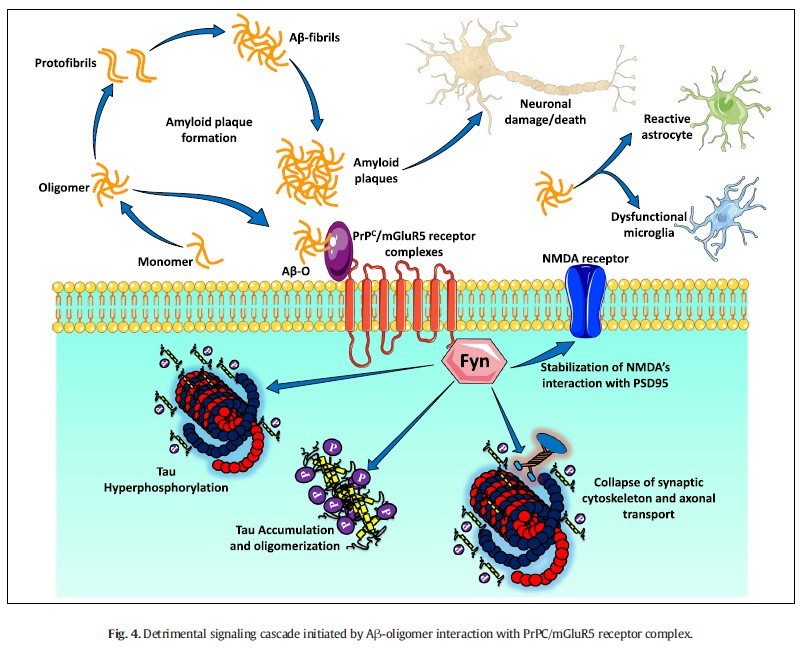

In [ ]:
display.display(display.Image(base64.b64decode(relevant_images[3])))

In [ ]:
result, relevant_image = answer("What enhances the pathological effects of tau")
print(result)

The pathological effects of tau in Alzheimer's disease are enhanced by several factors:

1. **Hyperphosphorylation of Tau**: This process leads to the dissociation of tau from microtubules, destabilizing them. Tau phosphorylation is typically a normal process; however, in Alzheimer's disease, the balance between phosphorylation and dephosphorylation is disrupted, leading to an accumulation of hyperphosphorylated tau.

2. **Impaired Tau Degradation**: Normally, tau proteins are degraded through autophagy and the ubiquitin-proteasome system (UPS). If these systems are impaired, it can lead to an accumulation of tau proteins, enhancing their pathological effects.

3. **Tau Aggregation**: Hyperphosphorylated tau proteins tend to aggregate, forming tau dimers, trimers, and ultimately insoluble granular tau oligomers, paired-helical filaments (PHFs), and neurofibrillary tangles (NFTs). These aggregates are toxic to neurons and are a hallmark of Alzheimer's disease.

4. **Intercellular Transf

In [ ]:
relevant_image

['/9j/4AAQSkZJRgABAQEAYABgAAD/2wBDAAMCAgMCAgMDAwMEAwMEBQgFBQQEBQoHBwYIDAoMDAsKCwsNDhIQDQ4RDgsLEBYQERMUFRUVDA8XGBYUGBIUFRT/2wBDAQMEBAUEBQkFBQkUDQsNFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBT/wAARCAJ5A24DASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD9U6KQ15h4b+JnjHxV4d0vWrDwAhsdStYry383W4lfy5EDruGw4OGGRmgD1CiuB/4S7x5/0T+D/wAHsX/xuj/hLvHn/RP4P/B7F/8AG6AO+orgf+Eu8ef9E/g/8HsX/wAbo/4S7x5/0T+D/wAHsX/xugDvqK4H/hLvHn/RP4

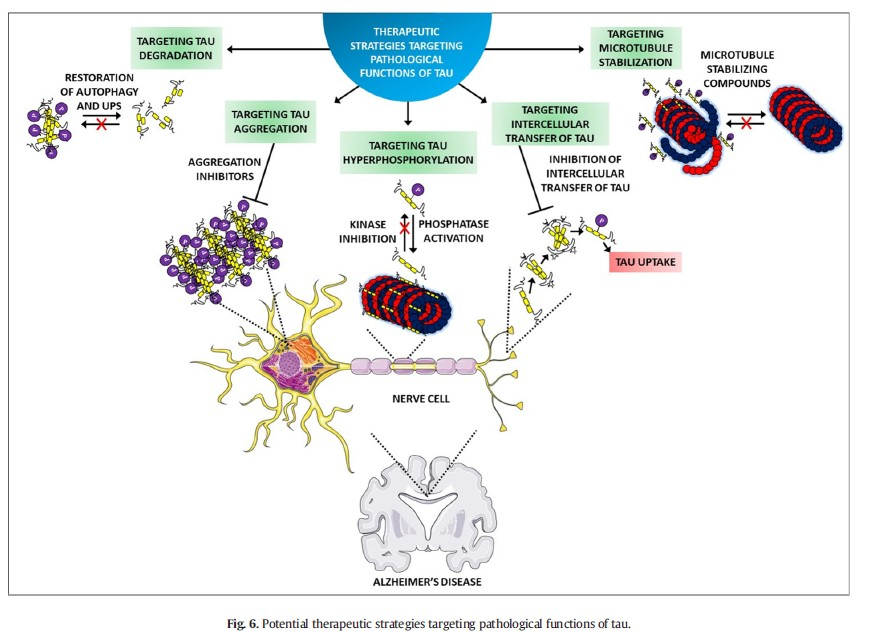

In [ ]:
display.display(display.Image(base64.b64decode(relevant_image[0])))

In [ ]:
result, images = answer("Describe the frameworks for diagnosing Alzheimer's disease")
print(result)

The frameworks for diagnosing Alzheimer's disease have evolved over time and incorporate both clinical criteria and biological markers. 

1. The **NINCDS-ADRDA (1984)** framework requires the clinical diagnosis of dementia, specifically memory or cognitive changes plus another cognitive impairment. No biological markers are used in this framework.

2. The **IWG Research Criteria (2007)** was designed for research purposes and requires the diagnosis of 'amnestic syndrome of the hippocampal type'. This framework introduces the use of biological markers such as CSF biomarkers, MRI atrophy, FDG-PET hypometabolism, amyloid PET positive, or AD autosomal dominant mutation.

3. The **NIA-AA (2011)** framework focuses on the clinical diagnosis of Mild Cognitive Impairment (amnestic or non-amnestic) or dementia. Biological markers used include Amyloid β marker (CSF or PET) or marker of degeneration (CSF tau, ptau, FDG-PET, or structural MRI).

4. The **NIA-AA (2018)** framework does not require 

In [ ]:
images

['/9j/4AAQSkZJRgABAQEAYABgAAD/2wBDAAMCAgMCAgMDAwMEAwMEBQgFBQQEBQoHBwYIDAoMDAsKCwsNDhIQDQ4RDgsLEBYQERMUFRUVDA8XGBYUGBIUFRT/2wBDAQMEBAUEBQkFBQkUDQsNFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBT/wAARCAE0AnEDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD9U6pa1qD6Ro97fR2N1qcltC8y2VkFM85VSRHGGZV3NjAywGTyRV2ik9hrc+c/Dv7Z0Pib4iaj4Itvg/8AEqPxDpiW8uo281rpgFnFOf3ckhF+flIBPy7jgdK9X+K3xY0j4P6NpOp6zbXtzBqWr2eiwrYojss1zKIo2bc6gI

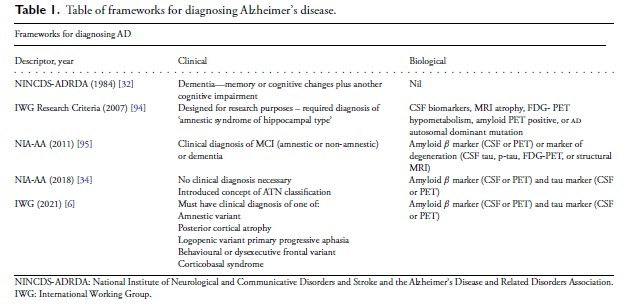

In [ ]:
display.display(display.Image(base64.b64decode(images[0])))

In [ ]:

query = "What are Representative microbial–immune interactions?"
docs = vectorstore.similarity_search(query)

In [ ]:
docs

[Document(page_content="The image appears to be a figure from a scientific article or paper. It shows a colorful, detailed diagram illustrating the interactions between gut microbiota and the immune system within the human gastrointestinal tract. The top portion of the image shows the lumen of the gut with various microbes, segmented filamentous bacteria (SFB), and immune cells like dendritic cells (DC) and naive T cells interacting with antigens and producing cytokines such as IL-17 and IL-22.\n\nThe bottom portion of the diagram goes into more detail about the signaling pathways and immune responses, including the production of antimicrobial peptides (AMP), TLR4 and MYD88 signaling, and various T cell responses like T helper, Treg, Th17, Tfh, Th2, and Th1 cells with their associated interleukins (IL-2, IL-6, IL-4, IL-12, IL-10, IL-17, IL-5, IFN-γ).\n\nThere is also a section showing the induction of IgA in Peyer's patches, its differentiation, and the role of dietary fibers such as s

In [ ]:
print(docs[0].page_content)


The image appears to be a figure from a scientific article or paper. It shows a colorful, detailed diagram illustrating the interactions between gut microbiota and the immune system within the human gastrointestinal tract. The top portion of the image shows the lumen of the gut with various microbes, segmented filamentous bacteria (SFB), and immune cells like dendritic cells (DC) and naive T cells interacting with antigens and producing cytokines such as IL-17 and IL-22.

The bottom portion of the diagram goes into more detail about the signaling pathways and immune responses, including the production of antimicrobial peptides (AMP), TLR4 and MYD88 signaling, and various T cell responses like T helper, Treg, Th17, Tfh, Th2, and Th1 cells with their associated interleukins (IL-2, IL-6, IL-4, IL-12, IL-10, IL-17, IL-5, IFN-γ).

There is also a section showing the induction of IgA in Peyer's patches, its differentiation, and the role of dietary fibers such as short-chain fatty acids (SCFA

In [ ]:
!pip install Bio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.0/281.0 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 16.2 MB/s eta 0:00:00


In [ ]:
!pip install requests

In [ ]:
!pip install bs4

In [ ]:
from Bio import Entrez
import requests
from bs4 import BeautifulSoup
import os

def fetch_pmc_ids(query, email, max_results=100):
    Entrez.email = email
    handle = Entrez.esearch(db="pmc", term=query, retmax=max_results)
    record = Entrez.read(handle)
    handle.close()
    return record["IdList"]

def download_images_from_pmc(pmc_ids, save_dir="images"):
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    image_count = 0

    for pmc_id in pmc_ids:
        url = f"https://www.ncbi.nlm.nih.gov/pmc/articles/PMC{pmc_id}/"
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'html.parser')
        img_tags = soup.find_all('img')

        for img_tag in img_tags:
            img_url = img_tag['src']
            if img_url.startswith('//'):
                img_url = 'https:' + img_url
            elif img_url.startswith('/'):
                img_url = f"https://www.ncbi.nlm.nih.gov{img_url}"

            img_data = requests.get(img_url).content
            img_name = os.path.join(save_dir, f"image_{image_count}.jpg")
            with open(img_name, 'wb') as handler:
                handler.write(img_data)
            image_count += 1

    print(f"Downloaded {image_count} images.")

query = "COVID-19"
email = "lahiri.aritra@gmail.com"
pmc_ids = fetch_pmc_ids(query, email)
download_images_from_pmc(pmc_ids)

Downloaded 400 images.


In [ ]:
!pip install fastapi uvicorn transformers torch pillow faiss-cpu requests biopython beautifulsoup4 pytesseract opencv-python-headless

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.2/92.2 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.0/27.0 MB 41.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)

In [ ]:
!pip install tesseract-ocr

  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tesseract-ocr
  Running setup.py clean for tesseract-ocr
Failed to build tesseract-ocr
ERROR: Could not build wheels for tesseract-ocr, which is required to install pyproject.toml-based projects


In [ ]:
import os
import requests
from bs4 import BeautifulSoup
import pytesseract
import cv2
from PIL import Image
from Bio import Entrez

def fetch_pmc_ids(query, email, max_results=100):
    Entrez.email = email
    handle = Entrez.esearch(db="pmc", term=query, retmax=max_results)
    record = Entrez.read(handle)
    handle.close()
    return record["IdList"]

def download_images_from_pmc(pmc_ids, save_dir="pubmed_images"):
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    image_count = 0

    for pmc_id in pmc_ids:
        url = f"https://www.ncbi.nlm.nih.gov/pmc/articles/PMC{pmc_id}/"
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'html.parser')
        img_tags = soup.find_all('img')

        for img_tag in img_tags:
            img_url = img_tag['src']
            if img_url.startswith('//'):
                img_url = 'https:' + img_url
            elif img_url.startswith('/'):
                img_url = f"https://www.ncbi.nlm.nih.gov{img_url}"

            img_data = requests.get(img_url).content
            img_name = os.path.join(save_dir, f"image_{image_count}.png")
            with open(img_name, 'wb') as handler:
                handler.write(img_data)
            image_count += 1

def extract_text_with_ocr(image_path):
    image = cv2.imread(image_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    text = pytesseract.image_to_string(gray_image)
    return text

query = "cancer"
email = "lahiri.aritra@gmail.com"
pmc_ids = fetch_pmc_ids(query, email)
download_images_from_pmc(pmc_ids)

KeyboardInterrupt: 

In [ ]:
import os
import requests
from bs4 import BeautifulSoup
from Bio import Entrez
import urllib.parse

def fetch_pmc_ids(query, email, max_results=100):
    """Fetches PMC IDs for articles matching the query."""
    Entrez.email = email
    handle = Entrez.esearch(db="pmc", term=query, retmax=max_results)
    record = Entrez.read(handle)
    handle.close()
    return record["IdList"]

def download_images_from_pmc(pmc_ids, save_dir="images"):
    """Downloads images from PMC articles."""
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    image_count = 0

    for pmc_id in pmc_ids:
        # Fetch the full article XML from PMC
        fetch_url = f"https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?db=pmc&id={pmc_id}&retmode=xml"
        response = requests.get(fetch_url)

        if response.status_code == 200:
            soup = BeautifulSoup(response.content, 'xml')
            # Search for all <graphic> tags, which usually contain images
            img_tags = soup.find_all('graphic')

            for img_tag in img_tags:
                if 'xlink:href' in img_tag.attrs:
                    img_url = img_tag['xlink:href']

                    # Creating absolute URL if it's a relative link
                    img_url = urllib.parse.urljoin("https://www.ncbi.nlm.nih.gov", img_url)

                    try:
                        img_data = requests.get(img_url, timeout=10)
                        img_data.raise_for_status()  # Raise an error for bad responses
                        img_name = os.path.join(save_dir, f"image_{image_count}.png")
                        with open(img_name, 'wb') as handler:
                            handler.write(img_data.content)
                        image_count += 1

                    except requests.exceptions.RequestException as e:
                        print(f"Failed to download {img_url}: {e}")
                else:
                    print("No valid image URL found in graphic tag.")

        else:
            print(f"Failed to fetch article for PMC {pmc_id}: HTTP {response.status_code}")

    print(f"Downloaded {image_count} images.")

# Sample usage
email = "lahiri.aritra@gmail.com"  # Enter your actual email address
query = "COVID-19"
pmc_ids = fetch_pmc_ids(query, email)
download_images_from_pmc(pmc_ids)

Failed to download https://www.ncbi.nlm.nih.gov/JTM2024-8710163.001: 404 Client Error: Not Found for url: https://www.ncbi.nlm.nih.gov/JTM2024-8710163.001
Failed to download https://www.ncbi.nlm.nih.gov/jogh-14-04134-F1: 404 Client Error: Not Found for url: https://www.ncbi.nlm.nih.gov/jogh-14-04134-F1
Failed to download https://www.ncbi.nlm.nih.gov/jogh-14-04134-F2: 404 Client Error: Not Found for url: https://www.ncbi.nlm.nih.gov/jogh-14-04134-F2
Failed to download https://www.ncbi.nlm.nih.gov/jogh-14-04134-F3: 404 Client Error: Not Found for url: https://www.ncbi.nlm.nih.gov/jogh-14-04134-F3
Failed to download https://www.ncbi.nlm.nih.gov/jogh-14-04134-F4: 404 Client Error: Not Found for url: https://www.ncbi.nlm.nih.gov/jogh-14-04134-F4
Failed to download https://www.ncbi.nlm.nih.gov/fnut-11-1398108-g001: 404 Client Error: Not Found for url: https://www.ncbi.nlm.nih.gov/fnut-11-1398108-g001
Failed to download https://www.ncbi.nlm.nih.gov/fnut-11-1398108-g002: 404 Client Error: Not 

KeyboardInterrupt: 

In [ ]:
!pip install requests beautifulsoup4 lxml


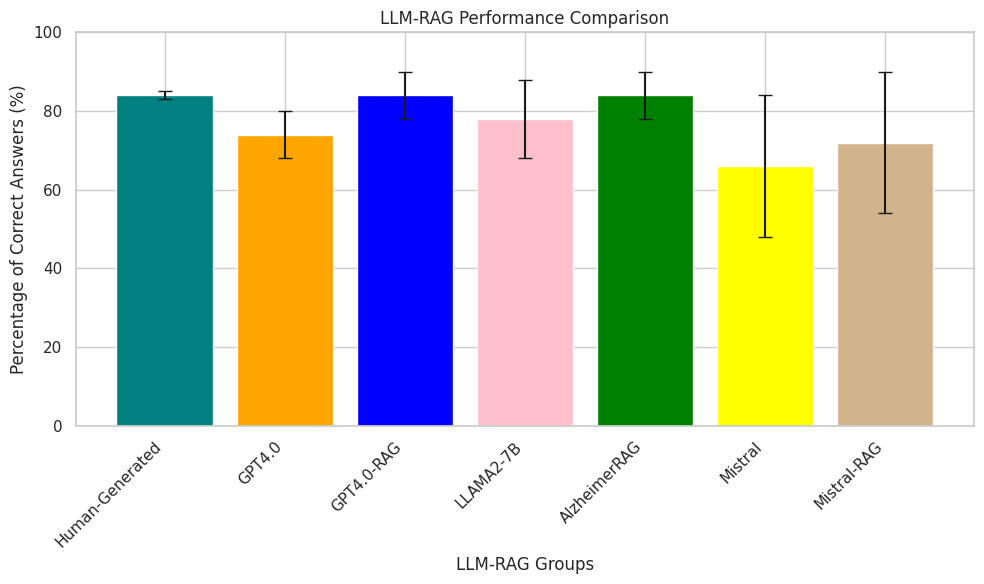

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Data
agents = [
    'Human-Generated',
    'GPT4.0', 'GPT4.0-RAG', 'LLAMA2-7B',
    'AlzheimerRAG', 'Mistral', 'Mistral-RAG'
]
percentages = [84, 74, 84, 78, 84, 66, 72]
errors = [1, 6, 6, 10, 6, 18, 18]

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(agents, percentages, yerr=errors, capsize=5, color=['teal', 'orange', 'blue', 'pink', 'green', 'yellow', 'tan', 'gray', 'cyan'])
plt.ylim(0, 100)

# Labels and title
plt.xlabel('LLM-RAG Groups')
plt.ylabel('Percentage of Correct Answers (%)')
plt.title('LLM-RAG Performance Comparison')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Show plot
plt.show()